In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_csv('hr_raw_data.csv', index_col= 0)

In [20]:
#AÑADIR ($) A NOMBRE DE LAS COLUMNAS: 
columnas_dolar = ["dailyrate", "hourlyrate", "monthlyincome", "monthlyrate", "sameasmonthlyincome", "salary"]
for c in columnas_dolar:
    df.rename(columns={c: c + "($)"}, inplace=True)



In [21]:
#LIMPIEZA DE DATOS PARA CONVENTIR DE OBJECT A FLOAT
columnas_a_float = ["monthlyincome($)", "totalworkingyears", "salary($)", "monthlyrate($)", "sameasmonthlyincome($)"]

for columna in columnas_a_float:

    df[columna] = df[columna].astype(str).str.replace('$', '', regex=False)
    print(f"La columna '{columna}' fue procesada para eliminación de símbolo $.")

    df[columna] = df[columna].str.replace(',', '.')
    print(f"La columna '{columna}' fue procesada para cambio de coma.")
    
    df[columna] = pd.to_numeric(df[columna], errors="coerce")
    print(f"La columna '{columna}' fue procesada para float.")


La columna 'monthlyincome($)' fue procesada para eliminación de símbolo $.
La columna 'monthlyincome($)' fue procesada para cambio de coma.
La columna 'monthlyincome($)' fue procesada para float.
La columna 'totalworkingyears' fue procesada para eliminación de símbolo $.
La columna 'totalworkingyears' fue procesada para cambio de coma.
La columna 'totalworkingyears' fue procesada para float.
La columna 'salary($)' fue procesada para eliminación de símbolo $.
La columna 'salary($)' fue procesada para cambio de coma.
La columna 'salary($)' fue procesada para float.
La columna 'monthlyrate($)' fue procesada para eliminación de símbolo $.
La columna 'monthlyrate($)' fue procesada para cambio de coma.
La columna 'monthlyrate($)' fue procesada para float.
La columna 'sameasmonthlyincome($)' fue procesada para eliminación de símbolo $.
La columna 'sameasmonthlyincome($)' fue procesada para cambio de coma.
La columna 'sameasmonthlyincome($)' fue procesada para float.


In [22]:
#UNIFICAR Y LIMPIAR DATOS EN REMOTEWORK(BOOLEANO)
df["remotework"] = df["remotework"].replace({"Yes": True,
                                             "1": True,
                                             "0": False,
                                             "True": True,
                                             "False": False})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13372\3107660277.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["remotework"] = df["remotework"].replace({"Yes": True,


In [23]:
#PONER TODOS LOS ELEMENTOS DE  LAS COLUMNAS EN MINÚSCULA
columnas_de_texto = df.select_dtypes(include=['object']).columns 

for columna in columnas_de_texto:
    df[columna] = df[columna].str.lower()
    

In [24]:
#ELIMINAR LOS GUIONES BAJOS DE LOS VALORES DE LAS COLUMNAS
for columna in columnas_de_texto:
    df[columna] = df[columna].str.replace('_', ' ', regex=False)
    df[columna] = df[columna].str.replace('-', ' ', regex=False)

In [25]:
#NORMALIZACIÓN MARITALSTATUS. 
df['maritalstatus'] = df['maritalstatus'].fillna('unknown').replace('marreid', 'married')


#DISTANCEFROMHOME
numerador = df[df['distancefromhome']<0].shape[0]
denominador = df.shape[0] #ACCEDEMOS AL NÚMERO TOTAL DE FILAS
porcentaje_negativos = (numerador/denominador)*100 #EVITAMOS NÚMEROS MÁGICOS
print(f'porcentaje de negativos que contiene distancefromhome: {porcentaje_negativos}')
df['distancefromhome'] = abs(df['distancefromhome']) #CON ABS TODA LA SERIE FUNCIONA COMO UN VALOR ABSOLUTO
print(f'comprobamos cantidad de negativos en distancefromhome, tras conversion en valor absoluto: {df[df['distancefromhome']<0].shape[0]}')


porcentaje de negativos que contiene distancefromhome: 12.038140643623361
comprobamos cantidad de negativos en distancefromhome, tras conversion en valor absoluto: 0


In [26]:
#NORMALIZACION DE AGE
mapeo = {'forty seven':47,'fifty eight':58, 'thirty six':36, 'fifty five':55,
       'fifty two':52, 'thirty one':31, 'thirty':30, 'twenty six':26, 'thirty seven':37,
       'thirty two':32, 'twenty four':24}


In [27]:
df["age"] = df["age"].replace(mapeo)

In [28]:
#CONVERSION DE OBJECT A INT
columnas_a_convertir = ["age","worklifebalance", "performancerating", "numberchildren", "yearsincurrentrole"]
for i in df.index:
    for col in columnas_a_convertir:
        # valor original
        valor_original = df.loc[i, col]
        # reemplazar coma por punto
        valor = str(valor_original).replace(",", ".")
        try:
            # Intentar convertir a número
            numero = float(valor)
            df.loc[i, col] = int(numero)
        except:
            # dejar el valor tal cual
            df.loc[i, col] = valor_original
#  Convertir cada columna a entero nullable (Int64)
for col in columnas_a_convertir:
    df[col] = df[col].astype("Int64")

In [29]:
df.head()

,age,attrition,businesstravel,dailyrate($),department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate($),jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome($),monthlyrate($),numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome($),datebirth,salary($),roledepartament,numberchildren,remotework
0,51,no,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,research director,3,unknown,16280.83,42330.17,7,y,no,13,3,3,full time,0,NaN,5,3,20,<NA>,15,15,16280.83,1972,195370.0,NaN,<NA>,True
1,52,no,NaN,2063.388889,NaN,1,4,life sciences,1,2,3,0,NaN,2,5,manager,3,unknown,NaN,43331.17,0,NaN,NaN,14,3,1,NaN,1,34.0,5,3,33,<NA>,11,9,NaN,1971,199990.0,NaN,<NA>,True
2,42,no,travel rarely,1984.253968,research & development,4,2,technical degree,1,3,3,0,NaN,3,5,manager,4,married,NaN,41669.33,1,NaN,no,11,3,4,NaN,0,22.0,3,<NA>,22,<NA>,11,15,NaN,1981,192320.0,manager research & development,<NA>,True
3,47,no,travel rarely,1771.404762,NaN,2,4,medical,1,4,1,1,NaN,3,4,research director,3,married,14307.50,37199.50,3,y,NaN,19,3,2,full time,2,NaN,2,<NA>,20,<NA>,5,6,14307.50,1976,171690.0,NaN,<NA>,False
4,46,no,NaN,1582.771346,NaN,3,3,technical degree,1,5,1,1,NaN,4,4,sales executive,1,divorced,12783.92,33238.20,2,y,no,12,3,4,NaN,1,NaN,5,3,19,<NA>,2,8,12783.92,1977,NaN,NaN,<NA>,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   Int64  
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate($)              1678 non-null   float64
 4   department                312 non-null    object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            904 non-null    object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   int64  
 12  hourlyrate($)             411 non-null    float64
 13  jobinvolvement            1678 non-null   int64  
 14  joblevel     

## LIMPIEZA DE NULOS

Tenemos un total de 16 columnas con nulos.


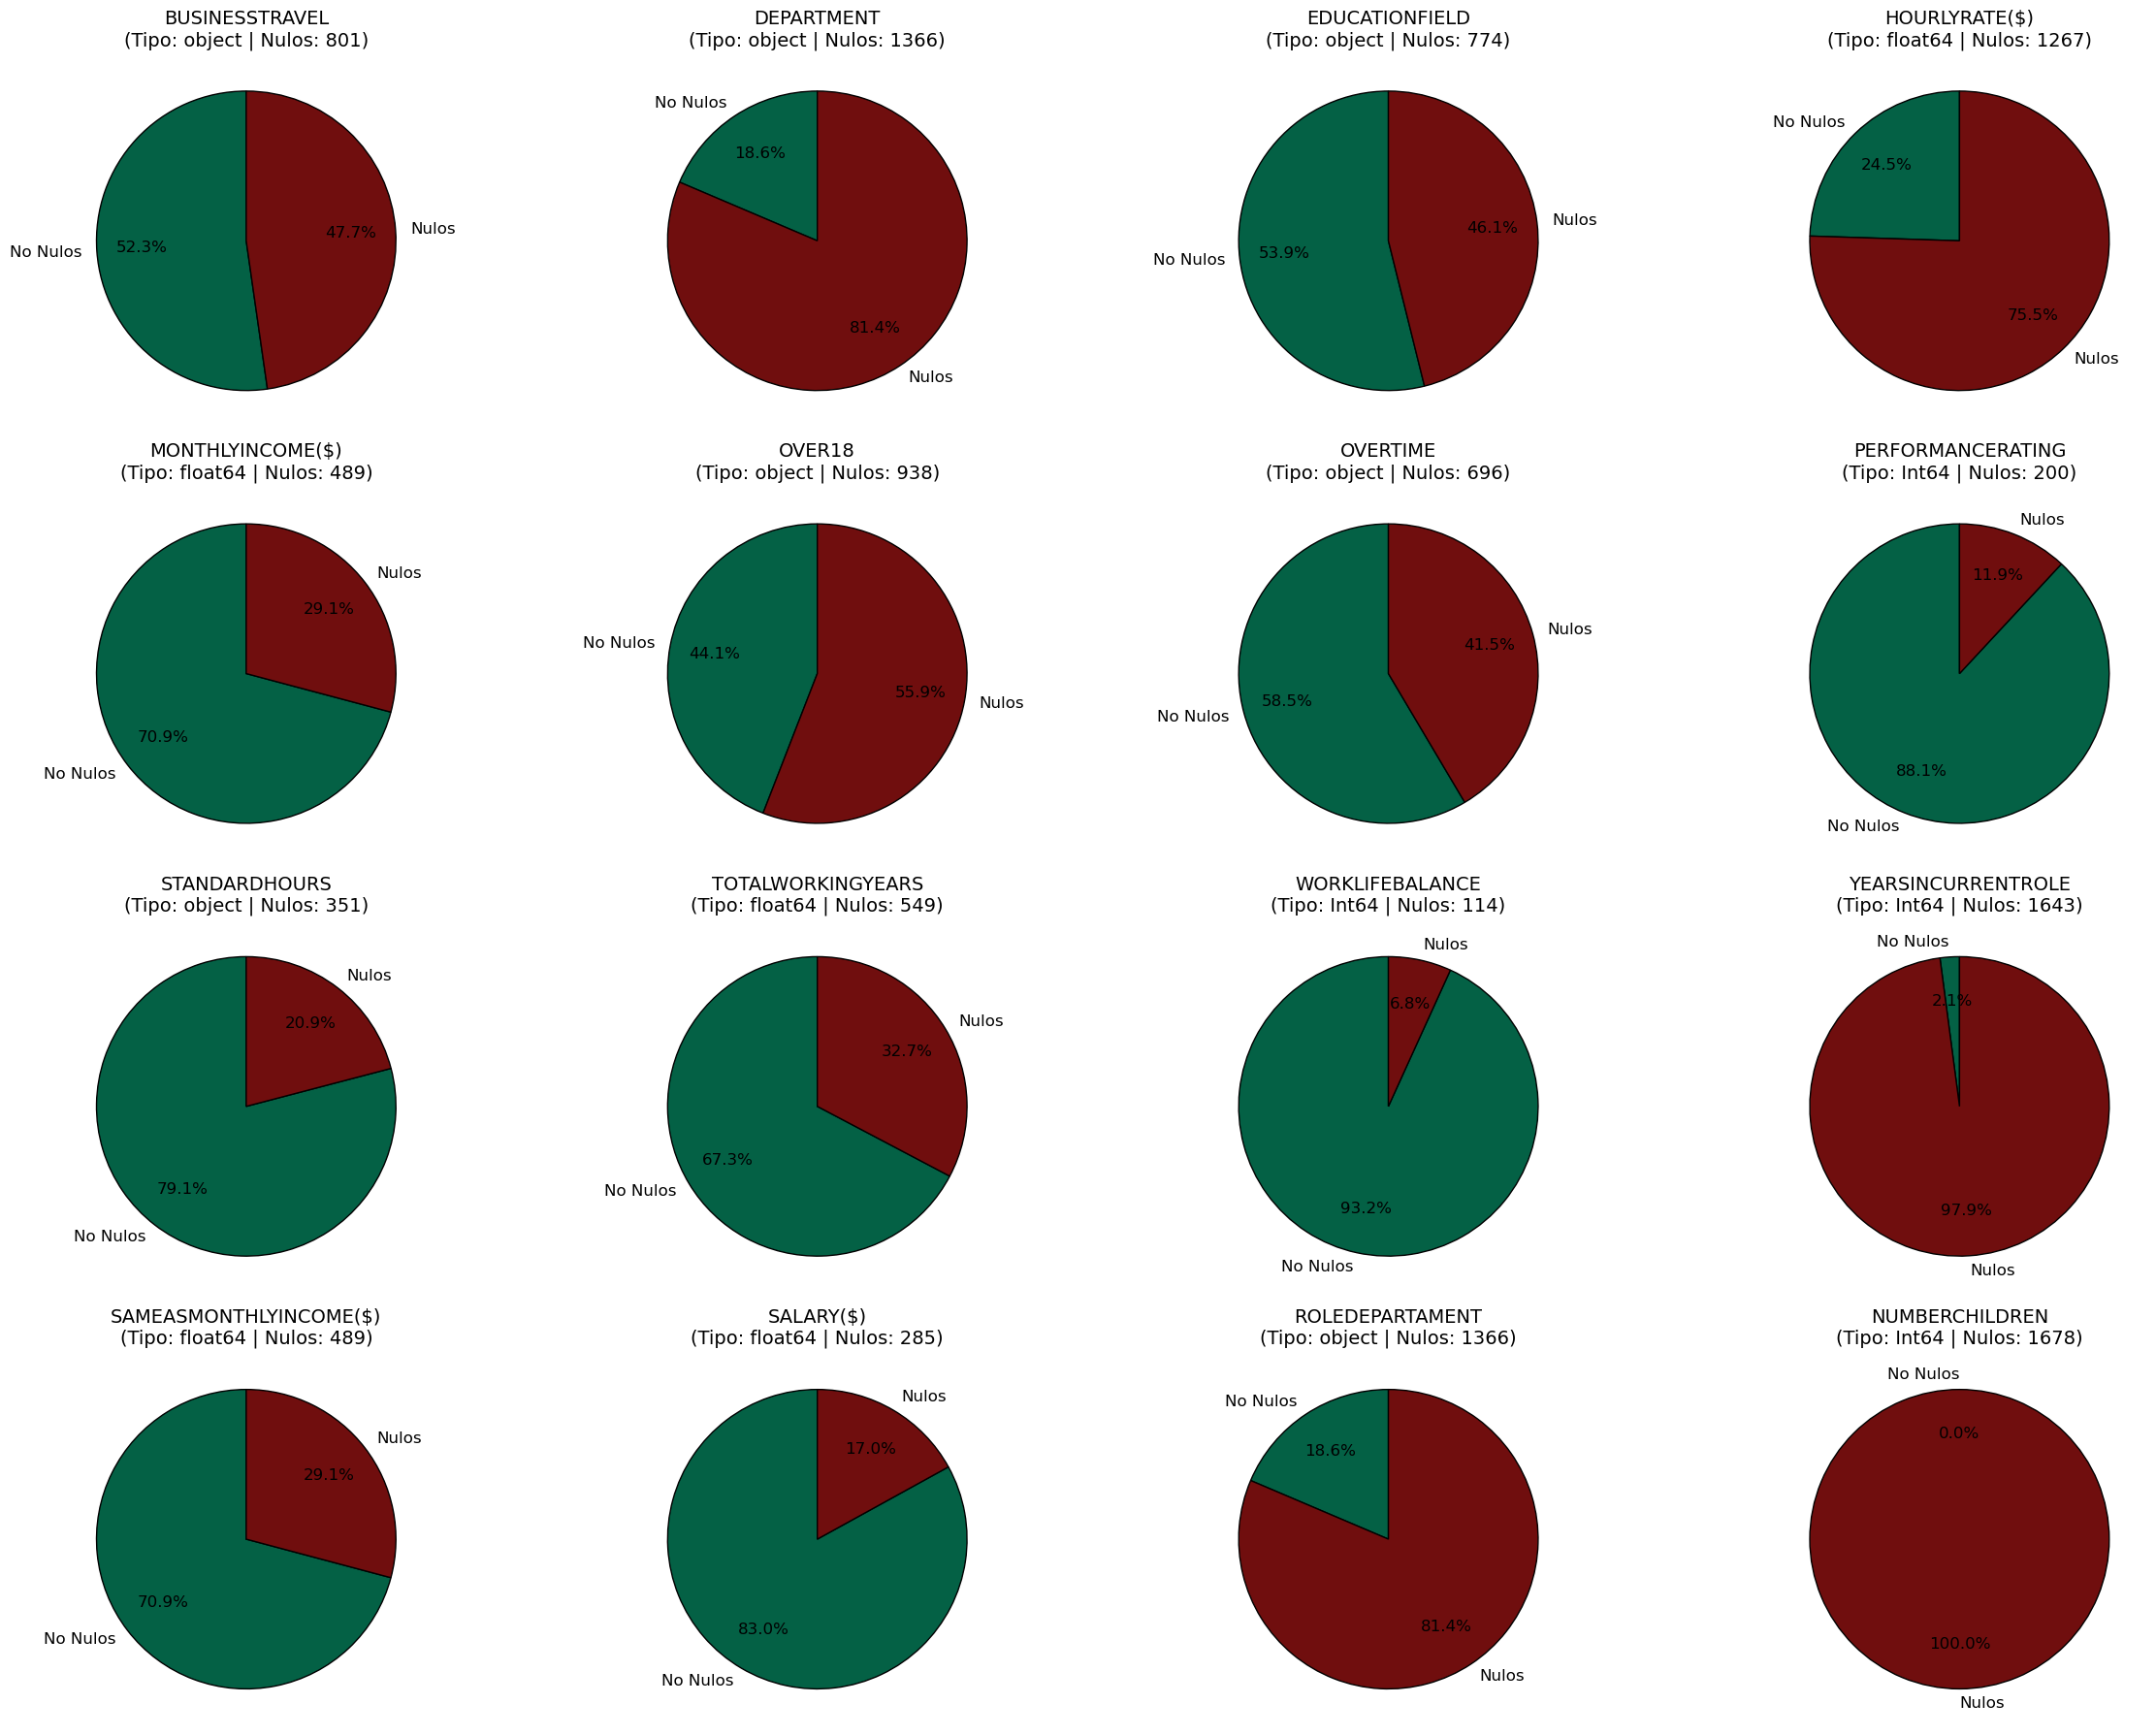

In [32]:
# --- CONFIGURACIÓN COLORES ---
NON_NULL_COLOR = "#046145" 
NULL_COLOR = "#700E0E" 
# --------------------------------

data_types = df.dtypes # DATOS INICIALES ANTES DE LA LIMPIEZA

# 2. FILTRADO: EXCLUIR COLUMNAS 0% NULL
total_filas = df.shape[0]
null_counts = df.isnull().sum()
null_porcentaje = (null_counts / total_filas) * 100
columnas_grafico = null_porcentaje[null_porcentaje > 0].index.tolist()
num_columnas = len(columnas_grafico)

print(f"Tenemos un total de {num_columnas} columnas con nulos.")

if num_columnas > 0: #CALCULA EL TAMAÑO DE LA CUADRICULA EN FUNCIÓN DE LAS COLUMNAS (ELEGIMOS 4 COLUMNAS POR FILA)
    ncols = 4 
    nrows = math.ceil(num_columnas / ncols) 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 4.5 * nrows)) #CREAMOS SUBPLOTS PARA VER TODAS LAS VISUALIZACIONES

    axes = axes.flat

    for indice, col in enumerate(columnas_grafico): #ITERAMOS Y CREAMOS VISUALIZACIÓN PIE
        
        tipo_dato = data_types[col] #ANADIMOS CONTEO DE NULOS Y NO NULOS
        num_nulos = df[col].isnull().sum()
        num_no_nulos = total_filas - num_nulos
        
        datos = [num_no_nulos, num_nulos]
        etiquetas = ['No Nulos', 'Nulos']
        
        colores = [NON_NULL_COLOR, NULL_COLOR] #ASGINAMOS COLORES

        wedges, texts, autotexts = axes[indice].pie( #VISUALIZACIÓN EN PIE
            datos,
            labels=etiquetas,
            autopct='%1.1f%%', #SIMBOLO %
            startangle=90,
            colors=colores,
            wedgeprops={'edgecolor': 'black'},
            textprops={'fontsize': 12},
            pctdistance=0.7 
        )

        for t in texts: #AUMENTAMOS FORMATO TEXTO
            t.set_fontsize(12)

        axes[indice].set_title(f'{col.upper()}\n(Tipo: {tipo_dato} | Nulos: {num_nulos})', fontsize=14) #TITULO 

    if num_columnas < len(axes): #LIMPIAMOS SUBPLOTS NO USADOS
        for i in range(num_columnas, len(axes)):
            fig.delaxes(axes[i]) 
            
    plt.tight_layout() #AJUSTAMOS DISEÑO

In [ ]:
nulos_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = 'O').columns.tolist()
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_cat)

Las columnas categóricas que tienen nulos son : 
 
['businesstravel', 'department', 'educationfield', 'over18', 'overtime', 'standardhours', 'roledepartament']


En el documento Fase _1_EDA se lleva a cabo un análisis columna por columna y se decide que todos los nulos de las columnas categóricas van a llevar 'Unknown'.

In [ ]:
#LIMPIEZA COLUMNAS CATEGÓRICAS
for c in nulos_cat: 
    df[c] = df[c].fillna('unknown')
df[nulos_cat].isnull().sum()

businesstravel     0
department         0
educationfield     0
over18             0
overtime           0
standardhours      0
roledepartament    0
dtype: int64

In [ ]:
#LIMPIEZA COLUMNAS NUMÉRICAS
nulos_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns.tolist()
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Las columnas numéricas que tienen nulos son : 
 
['hourlyrate($)', 'monthlyincome($)', 'performancerating', 'totalworkingyears', 'worklifebalance', 'yearsincurrentrole', 'sameasmonthlyincome($)', 'salary($)', 'numberchildren']


In [ ]:
#LIMPIEZA HOURLYRATE

print("Valores nulos ANTES de la corrección de hourlyrate:", df['hourlyrate($)'].isnull().sum())
mascara_nulos_hourly = df['hourlyrate($)'].isnull()

df.loc[mascara_nulos_hourly, 'hourlyrate($)'] = df['dailyrate($)'] / 8

print("Valores nulos DESPUÉS de la corrección de hourlyrate:", df['hourlyrate($)'].isnull().sum())
print("✅ Columna 'hourlyrate' corregida.")

Valores nulos ANTES de la corrección de hourlyrate: 1267
Valores nulos DESPUÉS de la corrección de hourlyrate: 0
✅ Columna 'hourlyrate' corregida.


In [ ]:
#LIMPIEZA MONTHLYINCOME

print("\nValores nulos ANTES de la corrección de monthlyincome:", df['monthlyincome($)'].isnull().sum())
mascara_nulos_monthly = df['monthlyincome($)'].isnull()

mascara_calculo_monthly = mascara_nulos_monthly & df['salary($)'].notnull()

df.loc[mascara_calculo_monthly, 'monthlyincome($)'] = df['salary($)'] / 12

print("Valores nulos DESPUÉS de la corrección de monthlyincome:", df['monthlyincome($)'].isnull().sum())
print("✅ Columna 'monthlyincome' corregida (parcialmente, si hay nulos en salary).")


Valores nulos ANTES de la corrección de monthlyincome: 489
Valores nulos DESPUÉS de la corrección de monthlyincome: 0
✅ Columna 'monthlyincome' corregida (parcialmente, si hay nulos en salary).


In [ ]:
#LIMPIEZA SALARY

print("\nValores nulos ANTES de la corrección de salary:", df['salary($)'].isnull().sum())
mascara_nulos_salary = df['salary($)'].isnull()

mascara_calculo_salary = mascara_nulos_salary & df['monthlyincome($)'].notnull()

df.loc[mascara_calculo_salary, 'salary($)'] = df['monthlyincome($)'] * 12

print("Valores nulos DESPUÉS de la corrección de salary:", df['salary($)'].isnull().sum())
print("✅ Columna 'salary' corregida (parcialmente, si quedan nulos en monthlyincome).")


Valores nulos ANTES de la corrección de salary: 285
Valores nulos DESPUÉS de la corrección de salary: 0
✅ Columna 'salary' corregida (parcialmente, si quedan nulos en monthlyincome).


In [ ]:
df[['dailyrate($)', 'hourlyrate($)', 'monthlyincome($)', 'salary($)']].isna().sum()

dailyrate($)        0
hourlyrate($)       0
monthlyincome($)    0
salary($)           0
dtype: int64

In [ ]:
# LIMPIEZA WORKLIFEBALANCE

print("Valores nulos ANTES de la corrección de worklifebalance:", df['worklifebalance'].isna().sum())

moda = df['worklifebalance'].mode()[0]
print("Valor de la moda:", moda)

moda = df['worklifebalance'].mode()[0]
df['worklifebalance'] = df['worklifebalance'].fillna(moda)

print("Valores nulos DESPUÉS de la corrección de worklifebalance:", df['worklifebalance'].isna().sum())


Valores nulos ANTES de la corrección de worklifebalance: 114
Valor de la moda: 3
Valores nulos DESPUÉS de la corrección de worklifebalance: 0


In [ ]:
#LIMPIEZA COLUMNAS NUMÉRICAS
nulos_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns.tolist()
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Las columnas numéricas que tienen nulos son : 
 
['performancerating', 'totalworkingyears', 'yearsincurrentrole', 'sameasmonthlyincome($)', 'numberchildren']


In [ ]:
df[['numberchildren', 'totalworkingyears']].fillna(pd.NA) #mantenemos los nulos con NaN

,numberchildren,totalworkingyears
0,<NA>,NaN
1,<NA>,34.0
2,<NA>,22.0
3,<NA>,NaN
4,<NA>,NaN
...,...,...
1673,<NA>,NaN
1674,<NA>,27.0
1675,<NA>,6.0
1676,<NA>,NaN


In [ ]:
df.head()

,age,attrition,businesstravel,dailyrate($),department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate($),jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome($),monthlyrate($),numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome($),datebirth,salary($),roledepartament,numberchildren,remotework
0,51,no,unknown,2015.722222,unknown,6,3,unknown,1,1,1,0,251.965278,3,5,research director,3,unknown,16280.830000,42330.17,7,y,no,13,3,3,full time,0,NaN,5,3,20,<NA>,15,15,16280.83,1972,195370.00,unknown,<NA>,True
1,52,no,unknown,2063.388889,unknown,1,4,life sciences,1,2,3,0,257.923611,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,unknown,14,3,1,unknown,1,34.0,5,3,33,<NA>,11,9,NaN,1971,199990.00,unknown,<NA>,True
2,42,no,travel rarely,1984.253968,research & development,4,2,technical degree,1,3,3,0,248.031746,3,5,manager,4,married,16026.666667,41669.33,1,unknown,no,11,3,4,unknown,0,22.0,3,3,22,<NA>,11,15,NaN,1981,192320.00,manager research & development,<NA>,True
3,47,no,travel rarely,1771.404762,unknown,2,4,medical,1,4,1,1,221.425595,3,4,research director,3,married,14307.500000,37199.50,3,y,unknown,19,3,2,full time,2,NaN,2,3,20,<NA>,5,6,14307.50,1976,171690.00,unknown,<NA>,False
4,46,no,unknown,1582.771346,unknown,3,3,technical degree,1,5,1,1,197.846418,4,4,sales executive,1,divorced,12783.920000,33238.20,2,y,no,12,3,4,unknown,1,NaN,5,3,19,<NA>,2,8,12783.92,1977,153407.04,unknown,<NA>,False


In [ ]:
#LIMPIEZA DE SAMEASMONTHLYINCOME
df['sameasmonthlyincome($)'] = df['sameasmonthlyincome($)'].fillna(df['monthlyincome($)'])

nulos_restantes = df['sameasmonthlyincome($)'].isnull().sum()

print(f"✅ Se han rellenado los nulos de 'sameasmonthlyincome($)'.")
print(f"Nulos restantes en la columna: {nulos_restantes}")

✅ Se han rellenado los nulos de 'sameasmonthlyincome($)'.
Nulos restantes en la columna: 0


In [ ]:
# LIMPIEZA PERFORMANCERATING

print("Valores nulos ANTES de la corrección de performancerating:", df['performancerating'].isna().sum())

moda = df['performancerating'].mode()[0]
print("Valor de la moda:", moda)

moda = df['performancerating'].mode()[0]
df['performancerating'] = df['performancerating'].fillna(moda)

print("Valores nulos DESPUÉS de la corrección de performancerating:", df['performancerating'].isna().sum())

Valores nulos ANTES de la corrección de performancerating: 200
Valor de la moda: 3
Valores nulos DESPUÉS de la corrección de performancerating: 0


In [ ]:
# LIMPIEZA DATEBIRTH

print("Valores nulos ANTES de la corrección de over18:", df['over18'].isna().sum())
df['datebirth'] = pd.to_datetime(df['datebirth'], format='%Y', errors='coerce')

# Esto crea una columna temporal de edad
hoy = pd.Timestamp.today()
df['age'] = (hoy - df['datebirth']).dt.days // 365

# Crear columna Over18 (True/False)
df['over18'] = df['age'] >= 18

print("Valores nulos DESPUÉS de la corrección de over18:", df['over18'].isna().sum())

Valores nulos ANTES de la corrección de over18: 0
Valores nulos DESPUÉS de la corrección de over18: 0


In [ ]:
# CONVERTIR GENDER A MALE-FEMALE

df['gender'] = df['gender'].replace({0: 'male', 1: 'female'})


In [ ]:
# CONVERTIR ENVIRONMENT SATISFACTION EN ESCALA DE 1 - 4

df['environmentsatisfaction'] = df['environmentsatisfaction'].astype(str).str[0]
df['environmentsatisfaction'] = df['environmentsatisfaction'].astype(str).str[0].astype(int)

In [ ]:
# EMPLOYEE NUMBER - ELIMINAR DUPLICADOS 

df['employeenumber'].duplicated().sum()

np.int64(64)

In [ ]:
df = df.drop_duplicates(subset='employeenumber')

In [ ]:
df['employeenumber'].duplicated().sum()

np.int64(0)

In [ ]:
df.to_csv("hr_data_clean.csv", index=True)